In [1]:
# HIDDEN
# The standard set of libraries we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

# The standard library for data in tables
import pandas as pd

# A tiny function to read a file directly from a URL
from urllib.request import urlopen

def read_url(url):
    return urlopen(url).read().decode()

In [2]:
# HIDDEN
# Read the text of Alice, split into chapters.
alice_url = 'https://www.gutenberg.org/files/11/11-0.txt'
alice_text = read_url(alice_url)
# Break the text into Chapters
alice_chapters = alice_text.split('CHAPTER ')
# Drop the first "Chapter" - it's the Project Gutenberg header
alice_chapters = alice_chapters[1:]

This page is largely derived from `Literary_Characters` of the UC Berkeley
course \- see the `license.md` file.

In *Alice's Adventures in Wonderland*, Alice follows a white rabbit down a
rabbit hole, and finds herself in Wonderland.  After various adventures, she
finds herself at a tea party with the March Hare and the Hatter.  Afterwards,
she wanders into the royal court of the playing cards, including the Queen and
King of Hearts.

We can see when these characters appear in the book, by counting how many
times their names are mentioned in each chapter.

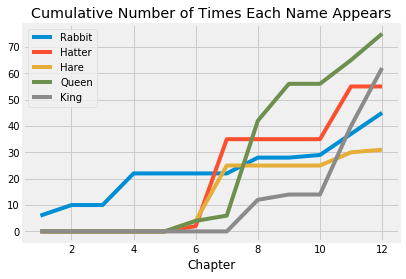

In [3]:
# Count how many times the characters appear in each chapter.
counts = pd.DataFrame.from_dict({
        'Rabbit': np.char.count(alice_chapters, 'Rabbit'),
        'Hatter': np.char.count(alice_chapters, 'Hatter'),
        'Hare': np.char.count(alice_chapters, 'Hare'),
        'Queen': np.char.count(alice_chapters, 'Queen'),
        'King': np.char.count(alice_chapters, 'King')},
    )

# The cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum()

# Add the chapter numbers
cum_counts['Chapter'] = np.arange(1, 13)

# Do the plot
cum_counts.plot(x='Chapter')
plt.title('Cumulative Number of Times Each Name Appears');

In the plot above, the horizontal axis shows chapter numbers and the vertical
axis shows how many times each character has been mentioned up to and
including that chapter.

Notice that the Rabbit appears in chapter 1, is missing from chapters 5, 6,
and 7, but returns for chapter 8.  The March Hare and the Hatter appear
at the same time, in chapter 7, which must be the tea party.  Last, the King
and Queen appear, in the chapters about the cards.